In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
print("Unique Values in 'sex': ", df['sex'].unique())
print("Unique Values in 'smoker': ", df['smoker'].unique())
print("Unique Values in 'region': ", df['region'].unique())

Unique Values in 'sex':  ['female' 'male']
Unique Values in 'smoker':  ['yes' 'no']
Unique Values in 'region':  ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_smoker = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])

In [11]:
## one hot encoding on region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [12]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [13]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([

    Dense(units=128, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='relu')
])

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=100)

Epoch 1/100


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 325489344.0000 - val_loss: 294474144.0000
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 331863040.0000 - val_loss: 294188864.0000
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 304921664.0000 - val_loss: 293505344.0000
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 315733472.0000 - val_loss: 292123936.0000
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 325822272.0000 - val_loss: 289690720.0000
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 330317280.0000 - val_loss: 285973056.0000
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 319952160.0000 - val_loss: 280457984.0000
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 324629696.0000 - val_loss: 272935200.0000
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 316734208.0000 - val_loss: 263271168.0000
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257090032.0000 - val_loss: 251730736.0000
E

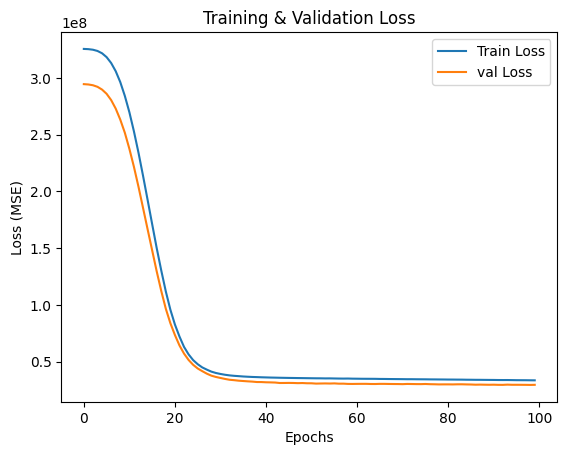

In [39]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

In [40]:
model.save("../model/insurance_ann_model.h5")

In [41]:
import pickle

with open("../model/scaler.pkl", "wb") as f:
    pickle.dump(scaler,f)